# Accessing trajectory data

First, import libraries:

In [1]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
Rtraj = xr.open_dataset('../../Data/6901254/6901254_Rtraj.nc')

In [3]:
Rtraj

<xarray.Dataset> Size: 1MB
Dimensions:                              (N_PARAM: 3, N_MEASUREMENT: 4289,
                                          N_CYCLE: 66, N_HISTORY: 1043)
Dimensions without coordinates: N_PARAM, N_MEASUREMENT, N_CYCLE, N_HISTORY
Data variables: (12/102)
    DATA_TYPE                            object 8B ...
    FORMAT_VERSION                       object 8B ...
    HANDBOOK_VERSION                     object 8B ...
    REFERENCE_DATE_TIME                  object 8B ...
    DATE_CREATION                        object 8B ...
    DATE_UPDATE                          object 8B ...
    ...                                   ...
    HISTORY_PARAMETER                    (N_HISTORY) object 8kB ...
    HISTORY_PREVIOUS_VALUE               (N_HISTORY) float32 4kB ...
    HISTORY_INDEX_DIMENSION              (N_HISTORY) object 8kB ...
    HISTORY_START_INDEX                  (N_HISTORY) float64 8kB ...
    HISTORY_STOP_INDEX                   (N_HISTORY) float64 8kB ...
    HISTORY_QCTEST                       (N_HISTORY) object 8kB ...
Attributes:
    title:                        Argo float trajectory file
    institution:                  CORIOLIS
    source:                       Argo float
    history:                      2019-01-15T11:25:20Z creation; 2020-06-25T1...
    references:                   http://www.argodatamgt.org/Documentation
    user_manual_version:          3.1
    Conventions:                  Argo-3.1 CF-1.6
    featureType:                  trajectory
    decoder_version:              CODA_035b
    comment_on_resolution:        JULD and PRES variable resolutions depend o...
    comment_on_measurement_code:  Meaning of some specific measurement codes ...

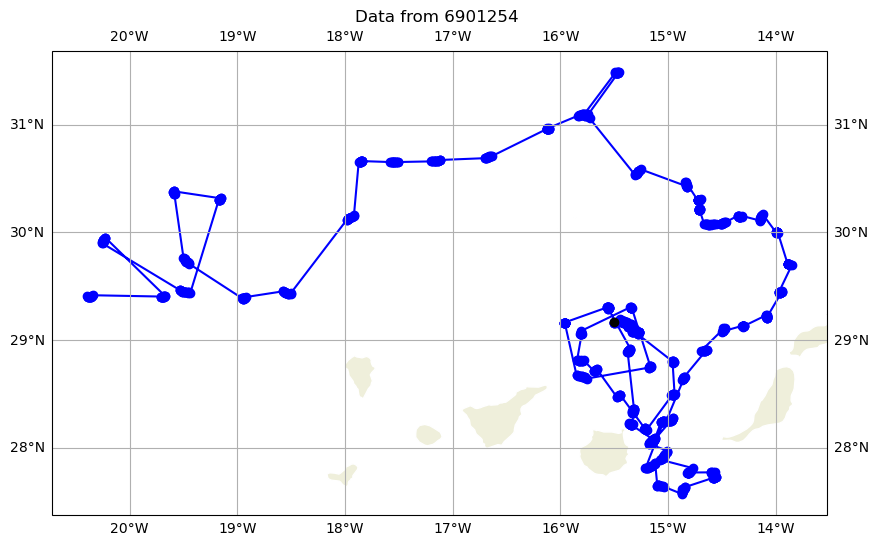

In [4]:
import cartopy.crs as ccrs
import cartopy



fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(Rtraj.LONGITUDE,Rtraj.LATITUDE,'ob')
ax.plot(Rtraj.LONGITUDE[~np.isnan(Rtraj.LONGITUDE)],Rtraj.LATITUDE[~np.isnan(Rtraj.LATITUDE)],'-b')
ax.plot(Rtraj.LONGITUDE[0],Rtraj.LATITUDE[0],'ok')
ax.plot(Rtraj.LONGITUDE[-1],Rtraj.LATITUDE[-1],'sk')

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='white')
ax.set_title(f"Data from {Rtraj.PLATFORM_NUMBER.values.astype(str)}")
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False);

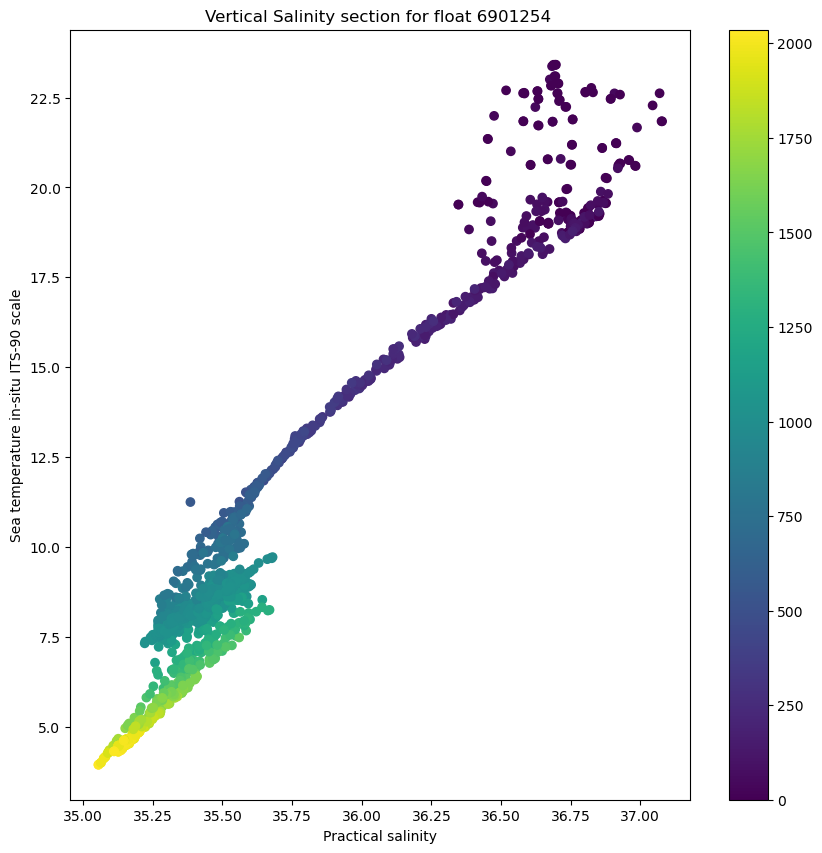

In [5]:
fig,ax = plt.subplots(figsize=(10,10))
sc=ax.scatter(Rtraj.PSAL,Rtraj.TEMP,c=Rtraj.PRES)
ax.set_title(f"Vertical Salinity section for float {Rtraj.PLATFORM_NUMBER.astype(str).values}")
ax.set_xlabel(f"{Rtraj.PSAL.long_name}")
ax.set_ylabel(f"{Rtraj.TEMP.long_name}")
fig.colorbar(sc);

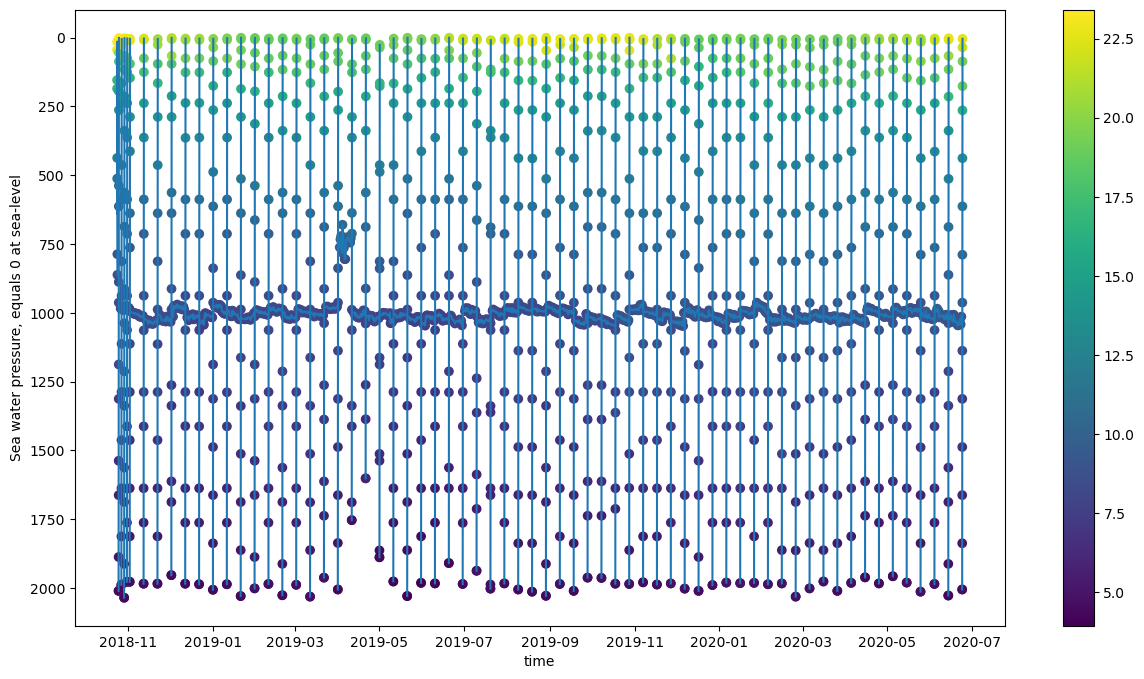

In [6]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(Rtraj.JULD,Rtraj.PRES,'-')
sc=ax.scatter(Rtraj.JULD,Rtraj.PRES,c=Rtraj.TEMP)
ax.set_xlabel(f"{Rtraj.JULD.standard_name}")
ax.set_ylabel(f"{Rtraj.PRES.long_name}")
ax.invert_yaxis()
fig.colorbar(sc);

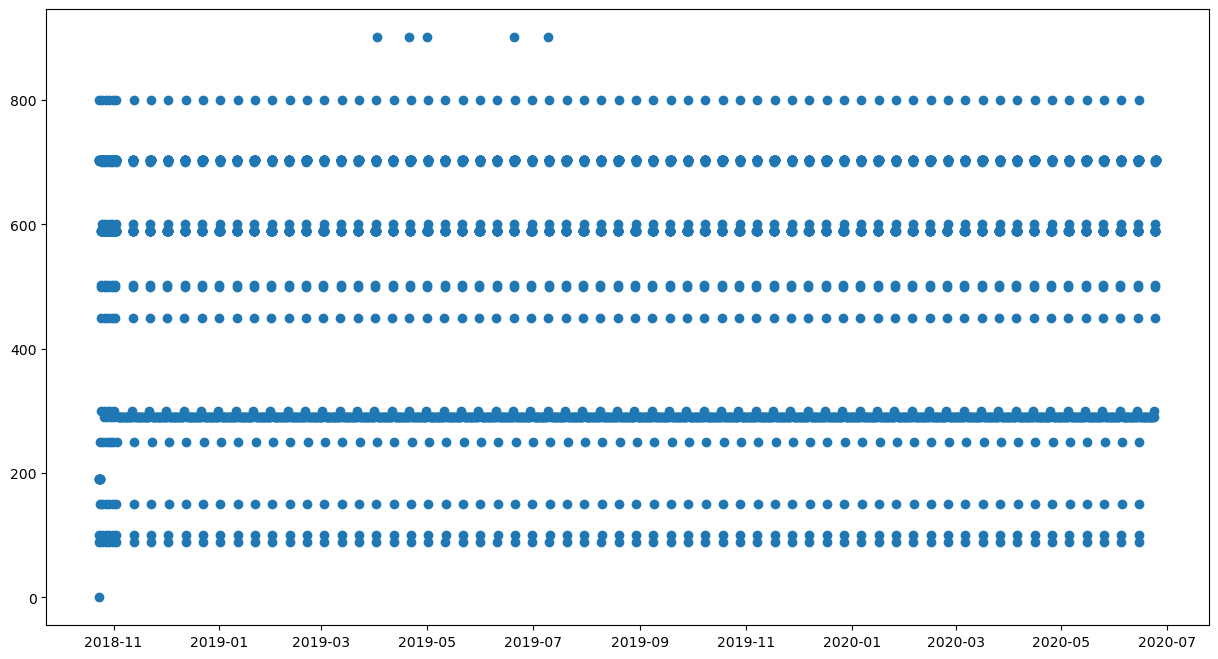

In [7]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(Rtraj.JULD,Rtraj.MEASUREMENT_CODE,'o');